In [2]:
import imdlib as imd
import geopandas as gpd
import numpy as np             
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns
import rioxarray  # for working with raster data and masking
import xarray as xr

In [2]:
import os
os.listdir()

['m23.csv',
 'India_State_Boundary.shx',
 'India_State_Boundary.shp.xml',
 'India_State_Boundary.sbx',
 'm22.csv',
 'India_Country_Boundary.dbf',
 'NITI_Aayog_all.csv',
 'India_State_Boundary.cpg',
 'm20.csv',
 'India_State_Boundary.shp',
 'm21.csv',
 'tmax',
 'rain',
 '.DS_Store',
 'm19.csv',
 'up17.csv',
 'm24.csv',
 'm18.csv',
 'India_Country_Boundary.shp.xml',
 'daily_avg_rainfall_up_2017_to_2023.csv',
 'd17.csv',
 'All_merged.csv',
 'India_Country_Boundary.cpg',
 'India_Country_Boundary.shp',
 'India_State_Boundary.dbf',
 'tmin',
 'India_Country_Boundary.sbx',
 'daily_avg_tmax_up_2017_to_2023.csv',
 'India_Country_Boundary.shx',
 'd20.csv',
 'd21.csv',
 'India_State_Boundary.sbn',
 'India_State_Boundary.prj',
 'd23.csv',
 'd22.csv',
 'Impact of weather variability on power demand.ipynb',
 'd19.csv',
 'd18.csv',
 'd24.csv',
 '.ipynb_checkpoints',
 'up19.csv',
 'up18.csv',
 'up24.csv',
 'm17.csv',
 'up23.csv',
 'up22.csv',
 'India_Country_Boundary.prj',
 'India_Country_Boundary.sbn'

#  Data Collection

### Rainfall and Temperature from IMD

In [3]:
# Download from IMD in .GRD format
#data = imd.get_data('tmax', 2017, 2023,'yearwise') #(variable, start_yr, end_yr, fn_format, file_dir)

In [4]:
# Download from IMD in .GRD format
#data = imd.get_data('tmin', 2017, 2023,'yearwise') #(variable, start_yr, end_yr, fn_format, file_dir)

In [5]:
# Download from IMD in .GRD format
#data = imd.get_data('rain', 2017, 2023,'yearwise') #(variable, start_yr, end_yr, fn_format, file_dir)

In [6]:
# Read IMD_.GRD data    (variable,  start_yr, end_yr, fn_format, file_dir)
#data_max = imd.open_data('tmax'    ,2017,     2023,  'yearwise') # kept in same dir

### Electricity Consumption from NITI Aayog

In [7]:
# Download in exal form and cleened by google sheet
e_all = pd.read_csv('NITI_Aayog_all.csv', parse_dates=['date'], index_col='date')
e_all

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh (UT),Chhattisgarh,DNH (UT),Delhi (UT),Goa,Gujarat,...,Pondicherry (UT)/Population,Punjab/Population,Rajasthan/Population,Sikkim/Population,Tamil Nadu/Population,Telangana/Population,Tripura/Population,UP/Population,Uttarakhand/Population,West Bengal/Population
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5336.69,95.00,801.33,2468.86,110.59,2574.13,898.02,1775.69,242.15,10132.63,...,178.468260,104.696847,117.612018,59.173536,144.166156,144.370845,48.653794,58.996756,101.560613,40.588493
2017-01-01 01:00:00,5298.24,95.00,773.54,2401.92,99.58,2575.35,896.69,1565.98,233.27,10130.93,...,178.396141,99.464960,112.671278,56.110859,140.645291,138.380045,44.127290,56.291818,98.662621,37.766287
2017-01-01 02:00:00,5193.17,95.00,739.62,2376.23,93.80,2529.59,888.63,1458.04,234.11,9829.56,...,175.070696,97.159542,110.295002,52.802513,137.305860,135.038111,40.395578,54.612393,93.315760,35.978416
2017-01-01 03:00:00,5136.10,95.00,723.57,2276.16,94.26,2517.46,881.76,1413.88,229.89,9595.83,...,173.636347,97.570811,107.904284,52.540466,135.805174,136.702222,39.246940,54.289590,92.276726,35.541609
2017-01-01 04:00:00,5533.07,95.00,725.32,2303.02,97.96,2520.96,885.62,1441.43,222.27,9482.91,...,172.394313,102.307084,100.582600,54.358418,138.819713,140.261562,38.876763,55.120870,96.219701,35.662451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30 19:00:00,8909.42,118.95,1742.18,5686.64,204.83,5922.05,1207.95,3937.19,597.46,18612.44,...,339.363742,242.661139,170.750648,148.384233,244.652621,258.004917,57.494494,103.909398,195.888638,108.547236
2024-04-30 20:00:00,8881.86,118.95,1713.84,5646.58,193.22,5773.07,1172.28,3753.42,598.62,17867.36,...,328.033187,221.622214,171.266487,131.154629,237.730645,254.396438,55.488461,103.827121,186.969602,107.410466
2024-04-30 21:00:00,9458.95,118.95,1614.30,5545.73,171.13,5680.85,1186.52,3543.18,591.86,17842.75,...,334.315475,207.125040,164.669546,118.854788,236.801154,261.920506,56.392129,101.912824,182.546767,107.176669


# Data Cleening

### Rainfall and Temperature

In [8]:
ind_geom = gpd.read_file('India_State_Boundary.shp')
up_geom = ind_geom[ind_geom['State_Name'] == 'Uttar Pradesh']

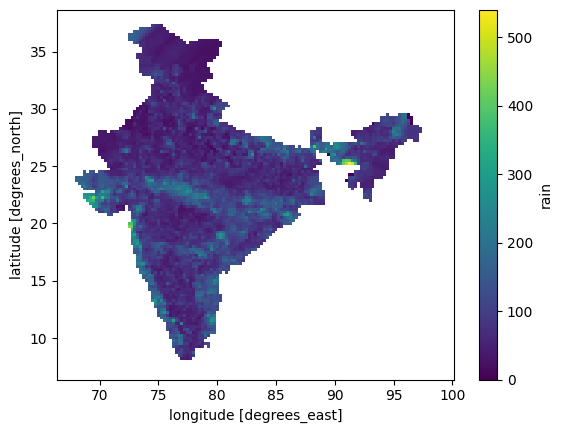

In [9]:
imd_r = imd.open_data('rain', 2020, 2020,'yearwise') # (variable, start_yr, end_yr, fn_format='yearwise')
imd_ra = imd_r.get_xarray()
imd_rai = imd_ra.where(imd_ra['rain'] != -999.) #Remove NaN values
imd_rain = imd_rai['rain'].max('time')
imd_rain.plot()

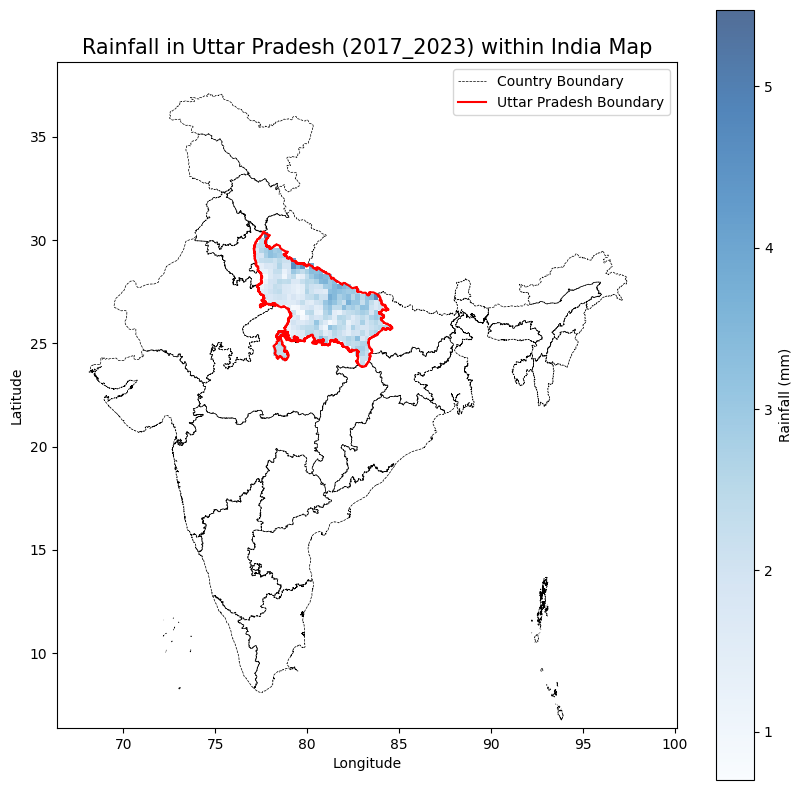

In [10]:
# Load rain data from IMD
imd_r = imd.open_data('rain', 2017, 2023, 'yearwise')  # (variable, start_yr, end_yr, fn_format='yearwise')
imd_ra = imd_r.get_xarray()
imd_rai = imd_ra.where(imd_ra['rain'] != -999.)  # Remove NaN values
imd_rain = imd_rai['rain'].mean('time')  # Calculate mean rainfall over the year

# Ensure rain data has geospatial coordinates
imd_rain = imd_rain.rio.write_crs(4326, inplace=True)  # Assume WGS84 lat/lon

# Reproject Uttar Pradesh boundary to match the rain data's CRS
up_geom = up_geom.to_crs(imd_rain.rio.crs)
ind_geom = ind_geom.to_crs(imd_rain.rio.crs)  # Ensure whole country is also in the same CRS

# Clip/mask the rain data to Uttar Pradesh geometry
rain_masked = imd_rain.rio.clip(up_geom.geometry, up_geom.crs, drop=False)  # Keep NaN outside UP

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the entire country boundary
ind_geom.boundary.plot(ax=ax, color='black', linewidth=0.5, linestyle='--')

# Plot Uttar Pradesh boundary (as an overlay)
up_geom.boundary.plot(ax=ax, color='red', linewidth=1.5)

# Plot the clipped rain data for Uttar Pradesh
rain_plot = rain_masked.plot(ax=ax, cmap='Blues', alpha=0.7, add_colorbar=False)

# Add a colorbar for rain data
cbar = fig.colorbar(rain_plot, ax=ax, orientation='vertical')
cbar.set_label('Rainfall (mm)')

# Add a custom legend for the country boundary and Uttar Pradesh boundary
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Country Boundary'),
                   Line2D([0], [0], color='red', lw=1.5, label='Uttar Pradesh Boundary')]

# Display the custom legend
ax.legend(handles=legend_elements, loc='upper right')

# Title and labels
ax.set_title('Rainfall in Uttar Pradesh (2017_2023) within India Map', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

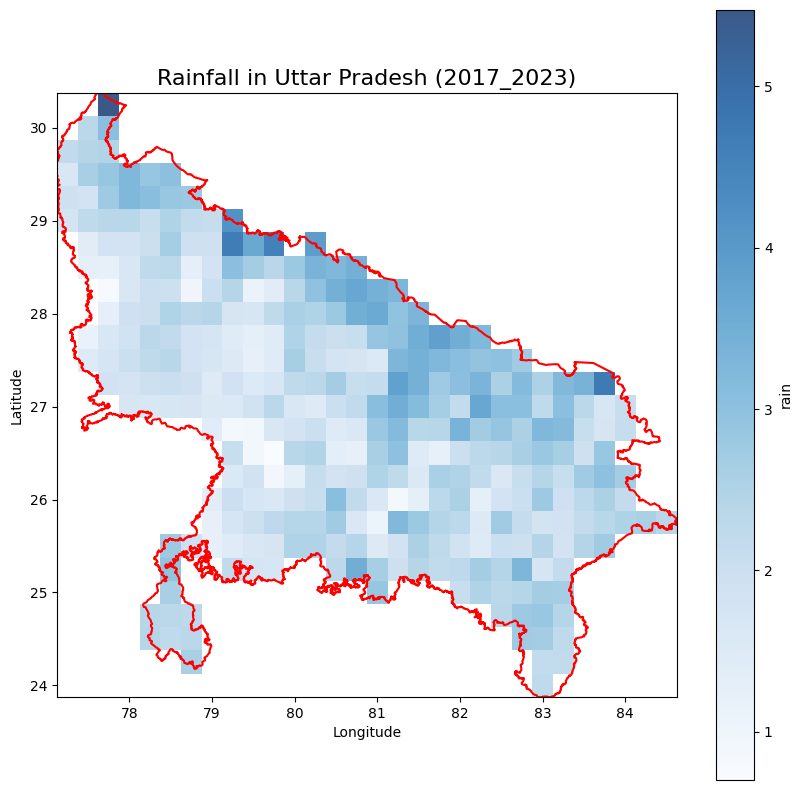

In [11]:
# Ensure rain data has geospatial coordinates
imd_rain = imd_rain.rio.write_crs(4326, inplace=True)  # Assume WGS84 lat/lon

# Reproject Uttar Pradesh boundary to match the rain data's CRS
up_geom = up_geom.to_crs(imd_rain.rio.crs)

# Clip/mask the rain data to Uttar Pradesh geometry
rain_masked = imd_rain.rio.clip(up_geom.geometry, up_geom.crs, drop=True)

# Plot the result
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the clipped rain data for Uttar Pradesh
rain_masked.plot(ax=ax, cmap='Blues', alpha=0.8)

# Highlight Uttar Pradesh boundary
up_geom.boundary.plot(ax=ax, color='red', linewidth=1.5)

# Title and labels
ax.set_title('Rainfall in Uttar Pradesh (2017_2023)', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [12]:
import geopandas as gpd
import pandas as pd
import rioxarray  # for working with raster data and masking
import xarray as xr

# Load India boundary shapefile and extract Uttar Pradesh boundary
ind_geom = gpd.read_file('India_State_Boundary.shp')
up_geom = ind_geom[ind_geom['State_Name'] == 'Uttar Pradesh']

# Load rain data from IMD
imd_r = imd.open_data('rain', 2017, 2023, 'yearwise')  # (variable, start_yr, end_yr, fn_format='daywise')
imd_ra = imd_r.get_xarray()
imd_rai = imd_ra.where(imd_ra['rain'] != -999.)  # Remove NaN values

# Ensure rain data has geospatial coordinates
imd_rai = imd_rai.rio.write_crs(4326, inplace=True)  # Assume WGS84 lat/lon

# Reproject Uttar Pradesh boundary to match the rain data's CRS
up_geom = up_geom.to_crs(imd_rai.rio.crs)

# Initialize a list to store the daily averages
daily_averages = []

# Loop over each day in 2020 and calculate the average rainfall in Uttar Pradesh
for day in imd_rai.time:
    # Extract data for the current day
    daily_rain = imd_rai.sel(time=day)['rain']
    
    # Clip/mask the daily rain data to Uttar Pradesh geometry
    rain_masked = daily_rain.rio.clip(up_geom.geometry, up_geom.crs, drop=False)
    
    # Calculate the average rainfall within Uttar Pradesh for this day
    daily_avg = rain_masked.mean().item()  # Mean of the non-NaN grid points
    
    # Append the date and daily average to the list
    daily_averages.append({'date': pd.to_datetime(day.values), 'average_rain': daily_avg})

# Convert the list of daily averages to a DataFrame
daily_avg_df = pd.DataFrame(daily_averages)

# Save the DataFrame to CSV
daily_avg_df.to_csv('daily_avg_rainfall_up_2017_to_2023.csv', index=False)

print("Daily average rainfall in Uttar Pradesh (2017 to 2023) saved to daily_avg_rainfall_up_2017_to_2023.csv'")

Daily average rainfall in Uttar Pradesh (2017 to 2023) saved to daily_avg_rainfall_up_2017_to_2023.csv'


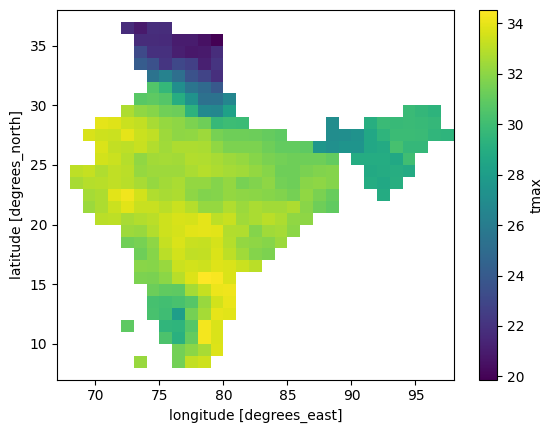

In [13]:
imd_r = imd.open_data('tmax', 2017, 2023, 'yearwise')  # (variable, start_yr, end_yr, fn_format='daywise')
imd_ra = imd_r.get_xarray()
imd_rai = imd_ra.where(imd_ra['tmax'] < 90)  # Remove NaN values
imd_rain = imd_rai['tmax'].mean('time')
imd_rain.plot()

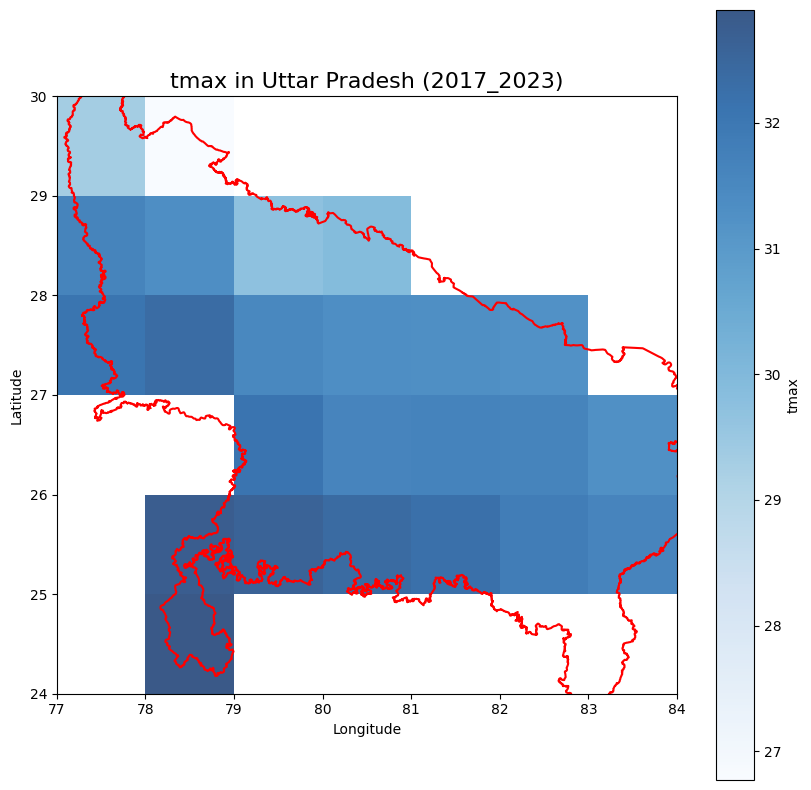

In [14]:
# Load tmax data from IMD
imd_r = imd.open_data('tmax', 2017, 2023, 'yearwise')  # (variable, start_yr, end_yr, fn_format='daywise')
imd_ra = imd_r.get_xarray()
imd_rai = imd_ra.where(imd_ra['tmax'] < 90)  # Remove NaN values
imd_rain = imd_rai['tmax'].mean('time')

# Ensure rain data has geospatial coordinates
imd_rain = imd_rain.rio.write_crs(4326, inplace=True)  # Assume WGS84 lat/lon

# Reproject Uttar Pradesh boundary to match the rain data's CRS
up_geom = up_geom.to_crs(imd_rain.rio.crs)

# Clip/mask the rain data to Uttar Pradesh geometry
rain_masked = imd_rain.rio.clip(up_geom.geometry, up_geom.crs, drop=True)

# Plot the result
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the clipped rain data for Uttar Pradesh
rain_masked.plot(ax=ax, cmap='Blues', alpha=0.8)

# Highlight Uttar Pradesh boundary
up_geom.boundary.plot(ax=ax, color='red', linewidth=1.5)

# Title and labels
ax.set_title('tmax in Uttar Pradesh (2017_2023)', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [15]:
# Load tmax data from IMD
imd_r = imd.open_data('tmax', 2017, 2023, 'yearwise')  # (variable, start_yr, end_yr, fn_format='daywise')
imd_ra = imd_r.get_xarray()
imd_rai = imd_ra.where(imd_ra['tmax'] < 90)  # Remove NaN values

# Ensure rain data has geospatial coordinates
imd_rai = imd_rai.rio.write_crs(4326, inplace=True)  # Assume WGS84 lat/lon

# Reproject Uttar Pradesh boundary to match the rain data's CRS
up_geom = up_geom.to_crs(imd_rai.rio.crs)

# Initialize a list to store the daily averages
daily_averages = []

# Loop over each day in 2020 and calculate the average rainfall in Uttar Pradesh
for day in imd_rai.time:
    # Extract data for the current day
    daily_rain = imd_rai.sel(time=day)['tmax']
    
    # Clip/mask the daily rain data to Uttar Pradesh geometry
    rain_masked = daily_rain.rio.clip(up_geom.geometry, up_geom.crs, drop=False)
    
    # Calculate the average rainfall within Uttar Pradesh for this day
    daily_avg = rain_masked.mean().item()  # Mean of the non-NaN grid points
    
    # Append the date and daily average to the list
    daily_averages.append({'date': pd.to_datetime(day.values), 'average_tmax': daily_avg})

# Convert the list of daily averages to a DataFrame
daily_avg_df = pd.DataFrame(daily_averages)

# Save the DataFrame to CSV
daily_avg_df.to_csv('daily_avg_tmax_up_2017_to_2023.csv', index=False)

print("Daily average tmax in Uttar Pradesh (2017 to 2023) saved to daily_avg_tmax_up_2017_to_2023.csv")

Daily average tmax in Uttar Pradesh (2017 to 2023) saved to daily_avg_tmax_up_2017_to_2023.csv


# Data Cleening

### Electricity

## Cleening multiple files and merge using pandas 

In [16]:
df = pd.read_csv('up17.csv') # raw data is like that Delhi [d17, d18, d19, d20, d21, d22, d23, d24] 
df                                # similarly Maharashtra [m17, m18, m19, m20, m21, m22, m23, m24]

,State,Date,Hourly Demand Met (in MW)
0,Uttar Pradesh - 2017,01-Jan 12am,11788.28
1,Uttar Pradesh - 2017,01-Jan 1am,11247.80
2,Uttar Pradesh - 2017,01-Jan 2am,10912.23
3,Uttar Pradesh - 2017,01-Jan 3am,10847.73
4,Uttar Pradesh - 2017,01-Jan 4am,11013.83
...,...,...,...
17519,Sikkim - 2017,31-Dec 11pm,48.01
17520,NaN,NaN,NaN
17521,"Copyright © 2024, NITI Aayog",NaN,NaN
17522,https://iced.niti.gov.in,NaN,NaN


In [17]:
d17_ = df[0:8761]
d17_.tail(4)

,State,Date,Hourly Demand Met (in MW)
8757,Uttar Pradesh - 2017,31-Dec 9pm,13378.49
8758,Uttar Pradesh - 2017,31-Dec 10pm,12878.15
8759,Uttar Pradesh - 2017,31-Dec 11pm,11919.77
8760,Sikkim - 2017,01-Jan 12am,36.13


In [18]:
df = pd.read_csv('d17.csv')
d17 = df[0:8760]
df = pd.read_csv('d18.csv')
d18 = df[0:8760]
df = pd.read_csv('d19.csv')
d19 = df[0:8760]
df = pd.read_csv('d20.csv')
d20 = df[0:8760]
df = pd.read_csv('d21.csv')
d21 = df[0:8760]
df = pd.read_csv('d22.csv')
d22 = df[0:8760]
df = pd.read_csv('d23.csv')
d23 = df[0:8760]
df = pd.read_csv('d24.csv')
d24 = df[0:2904]
# Concatenating all data into one DataFrame
delhi = pd.concat([d17, d18, d19, d20, d21, d22, d23, d24], ignore_index=True)

delhi

,State,Date,Hourly Demand Met (in MW),Unnamed: 3,Unnamed: 4,a
0,Delhi - 2017,01-Jan 12am,1775.69,NaN,NaN,NaN
1,Delhi - 2017,01-Jan 1am,1565.98,NaN,NaN,NaN
2,Delhi - 2017,01-Jan 2am,1458.04,NaN,NaN,NaN
3,Delhi - 2017,01-Jan 3am,1413.88,NaN,NaN,NaN
4,Delhi - 2017,01-Jan 4am,1441.43,NaN,NaN,NaN
...,...,...,...,...,...,...
64219,Delhi - 2024,30-Apr 7pm,3937.19,NaN,NaN,NaN
64220,Delhi - 2024,30-Apr 8pm,3753.42,NaN,NaN,NaN
64221,Delhi - 2024,30-Apr 9pm,3543.18,NaN,NaN,NaN
64222,Delhi - 2024,30-Apr 10pm,3505.90,NaN,NaN,NaN


In [19]:
# Step 1: Extract the year from the "State" column
delhi['Year'] = delhi['State'].str.extract(r'(\d{4})').astype(int)

# Step 2: Convert "Date" column to datetime format (with year 1900 as a placeholder)
delhi['DateTime'] = pd.to_datetime(delhi['Date'] + ' ' + delhi['Year'].astype(str), format='%d-%b %I%p %Y')

# Step 3: Drop unnecessary columns
delhi_cleaned = delhi[['DateTime', 'Hourly Demand Met (in MW)']]

# Step 4: Rename columns for the final format
delhi_cleaned.columns = ['date', 'Delhi']

# Display the final DataFrame
delhi_cleaned

,date,Delhi
0,2017-01-01 00:00:00,1775.69
1,2017-01-01 01:00:00,1565.98
2,2017-01-01 02:00:00,1458.04
3,2017-01-01 03:00:00,1413.88
4,2017-01-01 04:00:00,1441.43
...,...,...
64219,2024-04-30 19:00:00,3937.19
64220,2024-04-30 20:00:00,3753.42
64221,2024-04-30 21:00:00,3543.18
64222,2024-04-30 22:00:00,3505.90


In [20]:
# download the DataFrame(delhi) as a (delhi_ok.csv)as a file_name
#delhi.to_csv('delhi_ok.csv', index=False)

In [21]:
%%time
# Reading and slicing the data
m17 = pd.read_csv('m17.csv').iloc[:8760]
m18 = pd.read_csv('m18.csv').iloc[:8760]
m19 = pd.read_csv('m19.csv').iloc[:8760]
m20 = pd.read_csv('m20.csv').iloc[:8760]
m21 = pd.read_csv('m21.csv').iloc[:8760]
m22 = pd.read_csv('m22.csv').iloc[:8760]
m23 = pd.read_csv('m23.csv').iloc[:8760]
m24 = pd.read_csv('m24.csv').iloc[:2904]

# Concatenating all data into one DataFrame
m = pd.concat([m17, m18, m19, m20, m21, m22, m23, m24], ignore_index=True)
# Step 1: Extract the year from the "State" column
m['Year'] = m['State'].str.extract(r'(\d{4})').astype(int)

# Step 2: Convert "Date" column to datetime format (with year 1900 as a placeholder)
m['DateTime'] = pd.to_datetime(m['Date'] + ' ' + m['Year'].astype(str), format='%d-%b %I%p %Y')

# Step 3: Drop unnecessary columns
maharashtra_cleaned = m[['DateTime', 'Hourly Demand Met (in MW)']]

# Step 4: Rename columns for the final format
maharashtra_cleaned.columns = ['date', 'Maharashtra']
maharashtra_cleaned

CPU times: user 148 ms, sys: 6.62 ms, total: 155 ms
Wall time: 201 ms


,date,Maharashtra
0,2017-01-01 00:00:00,12900.06
1,2017-01-01 01:00:00,12921.85
2,2017-01-01 02:00:00,12633.35
3,2017-01-01 03:00:00,12644.78
4,2017-01-01 04:00:00,12893.00
...,...,...
64219,2024-04-30 19:00:00,26254.60
64220,2024-04-30 20:00:00,25402.83
64221,2024-04-30 21:00:00,25059.46
64222,2024-04-30 22:00:00,25119.30


In [22]:
# Merge the two DataFrames on the 'date' column
merged_data = pd.merge(delhi_cleaned, maharashtra_cleaned, on='date')
merged_data

,date,Delhi,Maharashtra
0,2017-01-01 00:00:00,1775.69,12900.06
1,2017-01-01 01:00:00,1565.98,12921.85
2,2017-01-01 02:00:00,1458.04,12633.35
3,2017-01-01 03:00:00,1413.88,12644.78
4,2017-01-01 04:00:00,1441.43,12893.00
...,...,...,...
64219,2024-04-30 19:00:00,3937.19,26254.60
64220,2024-04-30 20:00:00,3753.42,25402.83
64221,2024-04-30 21:00:00,3543.18,25059.46
64222,2024-04-30 22:00:00,3505.90,25119.30


## Cleening multiple files and merge using Dask

In [33]:
import dask.dataframe as dd

In [24]:
df = dd.read_csv('d17.csv') # raw data is like that Delhi [d17, d18, d19, d20, d21, d22, d23, d24] 
df#.head(4)

,State,Date,Hourly Demand Met (in MW)
npartitions=1,,,
,object,object,float64
,...,...,...


In [25]:
df.head(4)

,State,Date,Hourly Demand Met (in MW)
0,Delhi - 2017,01-Jan 12am,1775.69
1,Delhi - 2017,01-Jan 1am,1565.98
2,Delhi - 2017,01-Jan 2am,1458.04
3,Delhi - 2017,01-Jan 3am,1413.88


In [26]:
df.tail(6)

,State,Date,Hourly Demand Met (in MW)
17518,Bihar - 2017,31-Dec 10pm,3169.22
17519,Bihar - 2017,31-Dec 11pm,2933.49
17520,NaN,NaN,NaN
17521,"Copyright © 2024, NITI Aayog",NaN,NaN
17522,https://iced.niti.gov.in,NaN,NaN
17523,The information on this platform is mainly tak...,NaN,NaN


In [27]:
%%time
# Reading and slicing the data using Dask

m17 = dd.read_csv('m17.csv').head(8760)
m18 = dd.read_csv('m18.csv').head(8760)
m19 = dd.read_csv('m19.csv').head(8760)
m20 = dd.read_csv('m20.csv').head(8760)
m21 = dd.read_csv('m21.csv').head(8760)
m22 = dd.read_csv('m22.csv').head(8760)
m23 = dd.read_csv('m23.csv').head(8760)
m24 = dd.read_csv('m24.csv').head(2904)

# Concatenating all data into one Dask DataFrame
m = dd.concat([m17, m18, m19, m20, m21, m22, m23, m24])

# Step 1: Extract the year from the "State" column
year_df = m['State'].str.extract(r'(\d{4})')

# Convert the extracted year to int and then assign it as a column
m['Year'] = year_df[0].astype(int)

# Step 2: Convert "Date" column to datetime format (with year 1900 as a placeholder)
m['DateTime'] = dd.to_datetime(m['Date'] + ' ' + m['Year'].astype(str), format='%d-%b %I%p %Y')

# Step 3: Drop unnecessary columns
maharashtra_cleaned = m[['DateTime', 'Hourly Demand Met (in MW)']]

# Step 4: Rename columns for the final format
maharashtra_cleaned = maharashtra_cleaned.rename(columns={'DateTime': 'date', 'Hourly Demand Met (in MW)': 'Maharashtra'})

# Compute the final result if necessary (optional)
maharashtra_cleaned = maharashtra_cleaned.compute()

# Display the result (optional)
print(maharashtra_cleaned)

                    date  Maharashtra
0    2017-01-01 00:00:00     12900.06
1    2017-01-01 01:00:00     12921.85
2    2017-01-01 02:00:00     12633.35
3    2017-01-01 03:00:00     12644.78
4    2017-01-01 04:00:00     12893.00
...                  ...          ...
2899 2024-04-30 19:00:00     26254.60
2900 2024-04-30 20:00:00     25402.83
2901 2024-04-30 21:00:00     25059.46
2902 2024-04-30 22:00:00     25119.30
2903 2024-04-30 23:00:00     25464.08

[64224 rows x 2 columns]
CPU times: user 198 ms, sys: 17.2 ms, total: 215 ms
Wall time: 214 ms


In [28]:
# Reading and slicing the data using Dask

m17 = dd.read_csv('d17.csv').head(8760)
m18 = dd.read_csv('d18.csv').head(8760)
m19 = dd.read_csv('d19.csv').head(8760)
m20 = dd.read_csv('d20.csv').head(8760)
m21 = dd.read_csv('d21.csv').head(8760)
m22 = dd.read_csv('d22.csv').head(8760)
m23 = dd.read_csv('d23.csv').head(8760)
m24 = dd.read_csv('d24.csv').head(2904)

# Concatenating all data into one Dask DataFrame
m = dd.concat([m17, m18, m19, m20, m21, m22, m23, m24])

# Step 1: Extract the year from the "State" column
year_df = m['State'].str.extract(r'(\d{4})')

# Convert the extracted year to int and then assign it as a column
m['Year'] = year_df[0].astype(int)

# Step 2: Convert "Date" column to datetime format (with year 1900 as a placeholder)
m['DateTime'] = dd.to_datetime(m['Date'] + ' ' + m['Year'].astype(str), format='%d-%b %I%p %Y')

# Step 3: Drop unnecessary columns
delhi_cleaned = m[['DateTime', 'Hourly Demand Met (in MW)']]

# Step 4: Rename columns for the final format
delhi_cleaned = delhi_cleaned.rename(columns={'DateTime': 'date', 'Hourly Demand Met (in MW)': 'Delhi'})

# Compute the final result if necessary (optional)
delhi_cleaned = delhi_cleaned.compute()

# Display the result (optional)
print(delhi_cleaned)

                    date    Delhi
0    2017-01-01 00:00:00  1775.69
1    2017-01-01 01:00:00  1565.98
2    2017-01-01 02:00:00  1458.04
3    2017-01-01 03:00:00  1413.88
4    2017-01-01 04:00:00  1441.43
...                  ...      ...
2899 2024-04-30 19:00:00  3937.19
2900 2024-04-30 20:00:00  3753.42
2901 2024-04-30 21:00:00  3543.18
2902 2024-04-30 22:00:00  3505.90
2903 2024-04-30 23:00:00  3381.62

[64224 rows x 2 columns]


In [29]:
# Merge the two DataFrames on the 'date' column
merged_data = dd.merge(delhi_cleaned, maharashtra_cleaned, on='date')
merged_data#.head(4)

,date,Delhi,Maharashtra
npartitions=1,,,
,datetime64[ns],float64,float64
,...,...,...


In [30]:
merged_data.head(4)

,date,Delhi,Maharashtra
0,2017-01-01,1775.69,12900.06
1,2019-01-01,1988.87,14162.90
2,2021-01-01,2105.45,16126.69
3,2022-01-01,2024.56,15798.71


## Analysis

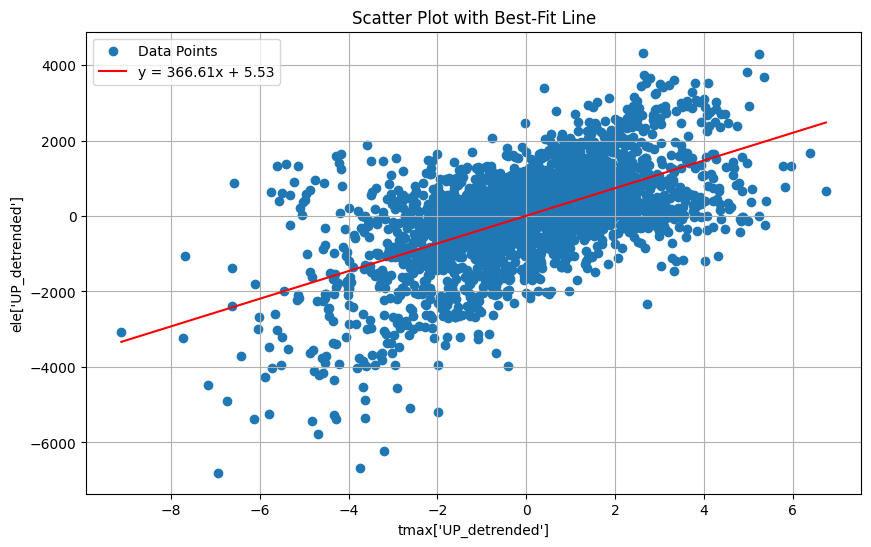

Equation of the best-fit line: y = 366.61x + 5.53


In [31]:
tmax = pd.read_csv('daily_avg_tmax_up_2017_to_2023.csv', parse_dates=['date'], index_col='date')
rolling_mean_15d_tmax = tmax['average_tmax'].rolling(window=15).mean()
tmax['UP_detrended'] = tmax['average_tmax'] - rolling_mean_15d_tmax

e_all = pd.read_csv('NITI_Aayog_all.csv', parse_dates=['date'], index_col='date')
avg_d = e_all.resample('d').mean()
avg_day = avg_d['2017-01-01':'2023-12-31']
ele = avg_day.resample('d').mean()
rolling_mean_15d_ele = avg_day['UP'].rolling(window=15).mean()
ele['UP_detrended'] = avg_day['UP'] - rolling_mean_15d_ele


# Prepare the data for the scatter plot
x = tmax['UP_detrended']
y = ele['UP_detrended']

# Ensure x and y have the same length by taking the common dates
# This will only include data where both tmax and ele have values
common_dates = x.index.intersection(y.index) 
x = x.loc[common_dates]
y = y.loc[common_dates]

# Remove NaN values
x = x.dropna()
y = y.dropna()

# Calculate the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
line_equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Generate points for the best fit line
x_line = np.linspace(min(x), max(x), 100)  # Generate 100 points for a smoother line
y_line = slope * x_line + intercept


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x_line, y_line, color='red', label=line_equation)

# Add labels and title
plt.xlabel("tmax['UP_detrended']")
plt.ylabel("ele['UP_detrended']")
plt.title("Scatter Plot with Best-Fit Line")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
print(f"Equation of the best-fit line: {line_equation}")